In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms.linear_transform import LinearMatrix
from nopt.constraints.sparsity import *
from nopt.constraints.rank import *
from nopt.problems.linear_problem import *
from nopt.problems.linear_problem_sum import *
from nopt.solvers.niht import *
from nopt.solvers.naht import *
from nopt.tests.generate_lsmat1 import *

In [2]:
m = 100
n = 100
rho_r = 0.2
rho_s = 0.2
delta = 0.5

p = round(delta*m*n)
s = round(rho_s*p)
alpha = s/(m*n)
r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))

In [3]:
l0, s0 = GenerateLSMat1((m,n), r, s, 1)
x0 = l0 + s0
HTr = Rank(r)
HTs = Sparsity(s)

Amat = np.random.normal(0,1, (p,m*n)) / np.sqrt(m*n)
A = LinearMatrix(Amat, shape_input = (m,n))
b = A.matvec(x0)

In [4]:
solver = NAHT(logverbosity = 2, maxiter = 5000)
constraints = (HTr, HTs)
problem = LinearProblemSum(A, b, constraints)

In [5]:
subspaces, x = solver._compute_initial_guess(A, b, constraints)

In [6]:
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm
 iter		   cost val	    grad. norm


TypeError: 'tuple' object does not support item assignment

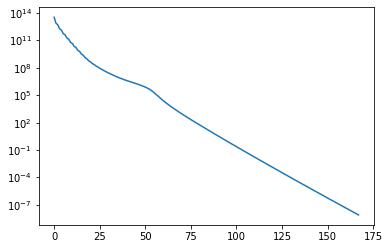

In [20]:
plt.semilogy(opt_log['iterations']['fx'])